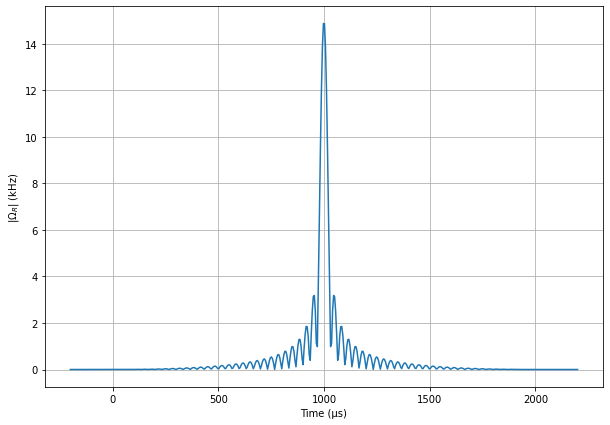

Progress: 100%|███████████████████████████████| 100/100 [00:21<00:00,  4.61it/s]


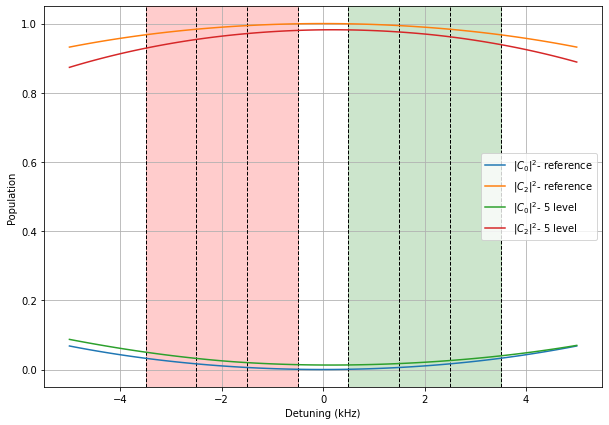

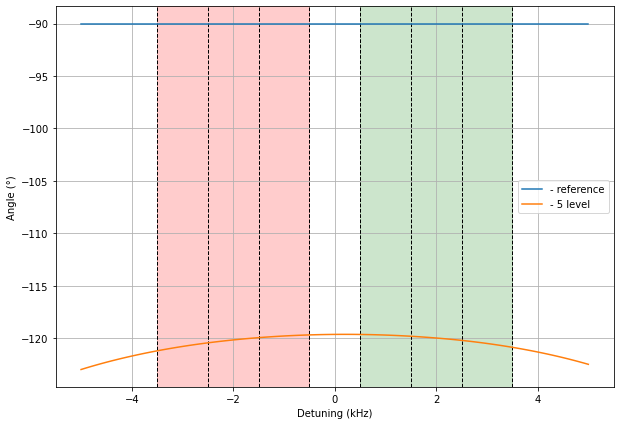

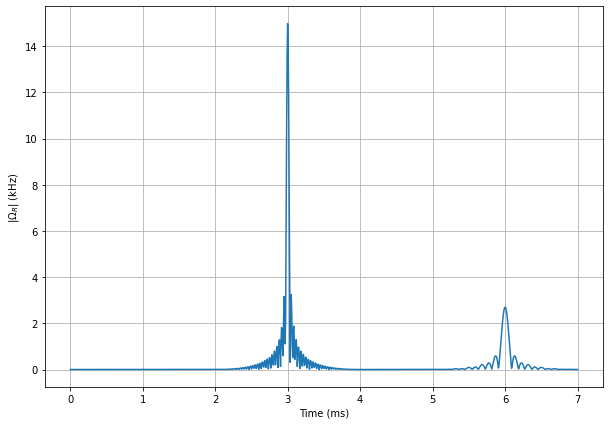

Progress: 100%|███████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]


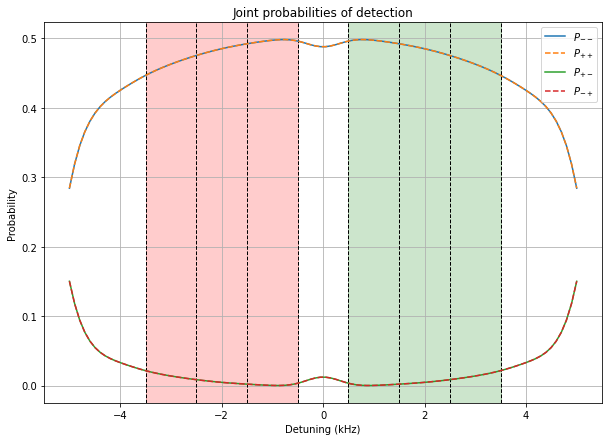

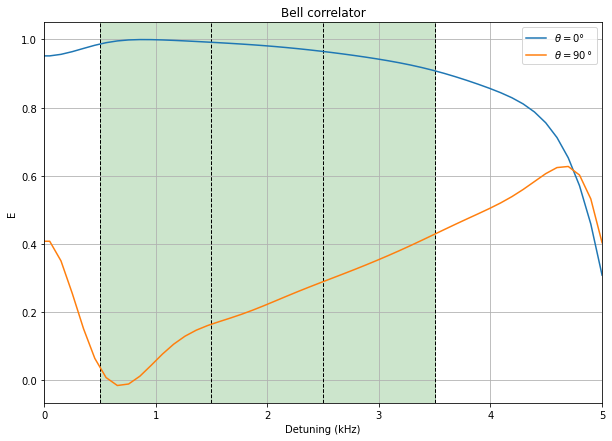

In [2]:
from bragg import Pulse, Bragg, Bell
import numpy as np

pi = np.pi


#
#There are three classes:
#- the Pulse class
#- the Bragg class
#- the Bell class
#
#For both Bragg and Bell you need the Pulse object to be defined. 
#You can either look at the result of one Bragg pulse (Bragg object)
#or at the result of the whole Bell simulation (Bell object)
#


##########################################################################
#################### PULSE DEFINITION AND PARAMETERS #####################
##########################################################################

# The pulse parameters are defined in a dictionnary

favorite_mirror = {
    "wavevector" : 2 * pi * np.sin( (32 / 2) * pi / 180 ) / 1083e-9, # a Bragg pulse transfers 2 * hbar * k
    "amplitude" : 2 * pi * 15000, # 2 photon Rabi freq in rad/s
    "duration" : 0.002, # in s
    "resonance frequencies" : 1, # 1 or 2 frequencies
    "shape" : "sinc",# sinc or constant
    "pulse type" : "mirror",# mirror or splitter
    "window coefficient" : 2, # apodization constant
    "window delay" : 0.000, # in s, crops the apodization window
    "phase difference" : 0 * pi / 180, # in rad, phase difference between A and B sub-interferometers
    "global phase" : 0, # in rad, global phase
    "phase drift" : 0 * pi / 180, # in rad, constant phase drift
    "detuning" : 2 * pi * 5500 # in rad/s, only used for a 2 frequencies pulse : detuning between the two
}


favorite_splitter = {
    "wavevector" : 2 * pi * np.sin( (32 / 2) * pi / 180 ) / 1083e-9, # a Bragg pulse transfers 2 * hbar * k
    "amplitude" : 2 * pi * 1350,
    "duration" : 0.002,
    "resonance frequencies" : 2,
    "shape" : "sinc",
    "pulse type" : "splitter",#mirror or splitter
    "window coefficient" : 2,
    "window delay" : 0.000,
    "phase difference" : 0 * pi / 180,
    "global phase" : 0,
    "phase drift" : 0 * pi / 180,
    "detuning" : 2 * pi * 5500
}


params1 = favorite_mirror

# Define the pulse object
pulse_1 = Pulse()
# Initialize it with the parameters from the dictionnary
pulse_1.set_params(params1)

# Plot the temporal shape of the pulse
pulse_1.plot()


# Same for another pulse
params2 = favorite_mirror
pulse_2 = Pulse()
pulse_2.set_params(params2)



##########################################################################
################ BRAGG ANALYSIS - REFLECTIVITY AND PHASE #################
##########################################################################

#  Bragg parameters
detuning_range = 2 * pi * 10 * 1e3

bragg_params1 = {
    "number of levels" : 2, # 2 or 5, corresponding to the levels considered of the Bragg model
    # Only used for time plots
    "detuning" :       2 * pi * 0 * 1e3, # in rad/s
    #only used for detuning plots
    "min detuning" : - detuning_range/2, # in rad/s
    "max detuning" : + detuning_range/2, # in rad/s
    "number of points" : 100,
    "box width" : 2 * pi * 1e3,  # in rad/s
    "number of boxes" : 3,
    "show boxes" : True
}

bragg_params2 = bragg_params1.copy()
bragg_params2["number of levels"] = 5


# Define the Bragg object and sets parameters
bragg_1 = Bragg()
bragg_1.set_params(bragg_params1, pulse_1)
bragg_2 = Bragg()
bragg_2.set_params(bragg_params2, pulse_1)# same pulse but different model
"""
bragg_1.time_plot_population(pulse_1) #temporal evolution of the probabilities and phase
bragg_1.time_plot_phase(pulse_1)
"""

# Computation of the complex coefficient of each level at the end of the pulse as a function of detuning
# The output of the compute function is a tuple (C0, C2) where
# C0 is the coefficient of the |p> state
# C2 is the coefficient of the |p+2*h_bar*k> state
results_1 = bragg_1.compute(pulse_1)
results_2 = bragg_2.compute(pulse_2)


# Add label
results_1 = results_1 + ("- reference",)
results_2 = results_2 + ("- 5 level",)

# Plot the results
results_to_display = [results_1,results_2]
# Reflectivity corresponds to the modulus squared of the coefficients
bragg_1.plot_reflectivity(results_to_display)
# Phase corresponds to 
# - the phase difference between the two coefficients for a splitter
# - the phase of the reflection coefficient C2 for a mirror
bragg_1.plot_phase(results_to_display)

# NB : the plot functions only depend on the detuning range of the Bragg object
# As long as the detuning range is the same you can plot the results for different Bragg pulses


##########################################################################
########## BELL ANALYSIS - CALCULATION OF THE BELL CORRELATOR ############
##########################################################################
# No need for Bragg objects here, but pulses mirror and splitter must be defined

# Define the puses
params1 = favorite_mirror
params2 = favorite_splitter
# Mirror
pulse_1 = Pulse()
pulse_1.set_params(params1)
# Splitters
sep_0 = Pulse()
sep_0.set_params(params2)
params90 = params2.copy()
params90["phase difference"] = pi / 2
sep_90 = Pulse()
sep_90.set_params(params90)


# Bell parameters

params_Bell = {
    "mirror center" : 0.003, #in s, absolute time of the center of the mirror pulse
    "splitter center" : 0.006, #in s, absolute time of the center of the splitter pulse
    "detuning range" : 2 * pi * 10 * 1e3, #in rad/s
    "number of points" : 100, # number of points to consider for the detuning
    "box width" : 2 * pi * 1e3, # in rad/s
    "number of boxes" : 3,
    "show boxes" : True,
    "remove transmitted atoms" : True, 
}


# Define the Bell object
Bell_simulation = Bell()
Bell_simulation.set_params(params_Bell,pulse_1, sep_0)

# Plots the interferometer scheme
Bell_simulation.plot_pulse()

# Same for nanother phase difference
Bell_simulation_90 = Bell()
Bell_simulation_90.set_params(params_Bell,pulse_1, sep_90)

# Computes the evolution of atom state during the Bell scheme
# The output contains a tuple with the four joint probabilities and the Bell correlator
results_0  = Bell_simulation.compute()
results_90  = Bell_simulation_90.compute()

# Plot the probabilities
Bell_simulation.plot_probabilities(results_0)

# Add label
results_0_to_plot = results_0 + (r"$\theta=0$°",)
results_90_to_plot = results_90 + (r"$\theta=90\,$°",)

# Plot the correlators
results = [results_0_to_plot,results_90_to_plot]
Bell_simulation.plot_correlator(results)